In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Data Exploration

In [3]:
import pandas as pd

# Import `fake_or_real_news.csv` 
file = pd.read_csv("fake_or_real_news.csv")
    
# Inspect shape of `df` 
print(file.shape)

# Print first lines of `df` 
file.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [111]:
#Setting the DataFrame index (row labels) using one or more existing columns
# Set index 
file = file.set_index("Unnamed: 0")

# Print first lines of `df` 
file.head()

,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to separate the labels and set up training and test datasets.
For this notebook, I decided to focus on using the longer article text.
Because I knew I would be using bag-of-words and Term Frequency–Inverse Document Frequency (TF-IDF) to extract features, 
this seemed like a good choice.
Using longer text will hopefully allow for distinct words and features for my real and fake news data.

In [5]:
# Set `y` 
y = file.label 
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
# Drop the `label` column
file.drop("label", axis=1)
file.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(file['text'].values.astype('str'), y , test_size=0.33, random_state=53)

### Building Vectorizer Classifiers

 Now that you have your training and testing data, you can build your classifiers. 
To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real,
you begin by using CountVectorizer and TfidfVectorizer.

You’ll see the example has a max threshhold set at .7 for the TF-IDF vectorizer tfidf_vectorizer using the max_df argument.
This removes words which appear in more than 70% of the articles.
Also, the built-in stop_words parameter will remove English stop words from the data before making vectors.

### 1. By Using Count Vectorizer

In [23]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [24]:
print(count_vectorizer.get_feature_names())

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km', '001', '0011', '002', '003', '004', '006', '006s', '007', '007s', '008', '008s', '009', '0099', '00am', '00p', '00pm', '01', '010', '013', '014', '015', '016', '018', '01am', '02', '020', '022', '023', '024', '025', '027', '028', '02welcome', '03', '031', '032', '0325', '033', '034', '035', '037', '039', '03eb', '04', '040', '0400', '042', '044', '048', '049', '04pm', '05', '0509245d29', '052', '056', '06', '062', '066', '068', '06pm', '07', '0700', '075', '076', '079', '07dryempjx', '08', '080', '081', '082', '084', '089', '0891', '09', '098263', '09am', '09pm', '0_jgdktlmn', '0a_merrill', '0d', '0fjjvowyhg8qtskiz', '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i', '0hq3vb2giv', '0in', '0jsn6pjkan', '0oeekvljlt', '0pt', '0t5', '0txrbwvobzz4fi5nksw6k5a6cxzbb3juxthmdiz93cby8gvrqiypzhajvjnt2', '0womdwalmi', '0x', '10', '100', '1000', '10009020', '1000s', '1001', '10021', '10028', '100515p', '100

In [32]:
print(count_train)
print(count_train.shape)

  (1, 36831)	1
  (1, 47506)	1
  (1, 38823)	1
  (1, 25684)	1
  (1, 21568)	1
  (1, 36087)	1
  (1, 16814)	1
  (1, 49203)	2
  (1, 25686)	1
  (1, 15927)	2
  (1, 29531)	2
  (1, 8399)	1
  (1, 42534)	1
  (1, 21881)	1
  (1, 35256)	1
  (1, 35783)	4
  (1, 51896)	2
  (1, 44520)	2
  (1, 15924)	2
  (1, 50628)	1
  (1, 54177)	1
  (1, 12105)	1
  (1, 42470)	1
  (2, 9445)	1
  (2, 8779)	1
  :	:
  (4243, 30464)	1
  (4243, 35836)	2
  (4243, 48084)	2
  (4243, 22146)	1
  (4243, 9042)	2
  (4243, 35190)	2
  (4243, 52934)	1
  (4243, 35037)	1
  (4243, 55388)	2
  (4243, 43875)	1
  (4243, 43172)	1
  (4243, 3441)	1
  (4243, 35035)	1
  (4243, 11982)	2
  (4243, 39633)	4
  (4243, 22069)	1
  (4243, 7184)	1
  (4243, 14871)	1
  (4243, 41311)	1
  (4243, 50690)	1
  (4243, 27842)	1
  (4243, 37695)	1
  (4243, 38823)	1
  (4243, 51896)	6
  (4243, 50628)	1
(4244, 56922)


In [29]:
# To view one-Hot coding
print(count_train.toarray()[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


### 2. By Using Tf-IDF Vectorizer

In [30]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [31]:
print(tfidf_vectorizer.get_feature_names())

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km', '001', '0011', '002', '003', '004', '006', '006s', '007', '007s', '008', '008s', '009', '0099', '00am', '00p', '00pm', '01', '010', '013', '014', '015', '016', '018', '01am', '02', '020', '022', '023', '024', '025', '027', '028', '02welcome', '03', '031', '032', '0325', '033', '034', '035', '037', '039', '03eb', '04', '040', '0400', '042', '044', '048', '049', '04pm', '05', '0509245d29', '052', '056', '06', '062', '066', '068', '06pm', '07', '0700', '075', '076', '079', '07dryempjx', '08', '080', '081', '082', '084', '089', '0891', '09', '098263', '09am', '09pm', '0_jgdktlmn', '0a_merrill', '0d', '0fjjvowyhg8qtskiz', '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i', '0hq3vb2giv', '0in', '0jsn6pjkan', '0oeekvljlt', '0pt', '0t5', '0txrbwvobzz4fi5nksw6k5a6cxzbb3juxthmdiz93cby8gvrqiypzhajvjnt2', '0womdwalmi', '0x', '10', '100', '1000', '10009020', '1000s', '1001', '10021', '10028', '100515p', '100

The result will show that there are 4244 documents and 56922 distinct features(words): (4244,56922)

In [34]:
print(tfidf_train)
print(tfidf_train.shape)

  (1, 42470)	0.07711040274149526
  (1, 12105)	0.15008066461476866
  (1, 54177)	0.13782629144711137
  (1, 50628)	0.061296988343109586
  (1, 15924)	0.3479045460649079
  (1, 44520)	0.4973826512693341
  (1, 51896)	0.11596517664605868
  (1, 35783)	0.30902690818827977
  (1, 35256)	0.12628385718450857
  (1, 21881)	0.21271688045815978
  (1, 42534)	0.06081715886809217
  (1, 8399)	0.08729542880625335
  (1, 29531)	0.1454406205718245
  (1, 15927)	0.4973826512693341
  (1, 25686)	0.13550453594288983
  (1, 49203)	0.1672740861784377
  (1, 16814)	0.10404977746548139
  (1, 36087)	0.12648679854389897
  (1, 21568)	0.1007920919566398
  (1, 25684)	0.1030420922189754
  (1, 38823)	0.06048803110658644
  (1, 47506)	0.14539060877460044
  (1, 36831)	0.10772488937433067
  (2, 16972)	0.1606296088662543
  (2, 762)	0.48803966069171073
  :	:
  (4243, 41435)	0.02969665315895183
  (4243, 53607)	0.044665186536595916
  (4243, 659)	0.04293180970016178
  (4243, 38834)	0.037049324915825195
  (4243, 19003)	0.03443753105034290

There are clearly comments, measurements or other nonsensical words as well as multilingual articles in the dataset that
you have been using. Normally, you would want to spend more time preprocessing this and removing noise, but as this tutorial 
just showcases a small proof of concept, you will see if the model can overcome the noise and properly
classify despite these issues.

In [22]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-365:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['àlvaro', 'ángel', 'âš', 'ædonis', 'élan', 'électroniques', 'élites', 'émigré', 'émirs', 'état', 'être', 'über', 'œlikeâ', 'œopened', 'ťfirst', 'ťlaw', 'ťnew', 'ťnon', 'ťpilgrim', 'ťsecond', 'ťthe', 'ťthird', 'ťtwo', 'ťwho', 'ź50', 'ελληνικά', 'главная', 'октября', 'русский', 'эa', 'эin', 'эthe', 'яркий', 'אדוני', 'אוהלים', 'אוי', 'אזורים', 'אזרחים', 'אחד', 'אחת', 'אין', 'אלו', 'אם', 'אמצעי', 'אני', 'אסטרטגי', 'אספקת', 'ארבעת', 'ארצנו', 'אש', 'את', 'באופן', 'באזורים', 'באיתור', 'בדומה', 'בדרום', 'בהגדרת', 'בהם', 'בהנאה', 'בו', 'בחבילת', 'בחיילינו', 'בימיה', 'בכבוד', 'בכדי', 'בכוח', 'בכל', 'במבצע', 'במידה', 'בנימין', 'בעין', 'בעקבות', 'ברוב', 'גבול', 'גורלית', 'גוש', 'גרורות', 'גרורותיו', 'דבר', 'דע', 'האויב', 'האוייב', 'האוכלוסייה', 'האופנסיבה', 'האזורים', 'האזרחיים', 'האזרחית', 'האסטרטגי', 'האסטרטגיה', 'האסלאם', 'האש', 'הבא', 'הבאות', 'הבנוי', 'הגדרת', 'הגירה', 'ההפנמה', 'ההתנגדות', 'הוא', 'הזה', 'הזו', 'החוק', 'החיזבאללא', 'החמאס', 'החמס', 'החשמל', 'הטילים', 'היו', 'היסוד', 'היעד', 

### Count versus TF-IDF Features: Values of Token Generated by Both The Vectorizers Are Same

I was curious if my count and TF-IDF vectorizers had extracted different tokens. To take a look and compare features, you can extract the vector information back into a DataFrame to use easy Python comparisons.

As you can see by running the cells below, both vectorizers extracted the same tokens, but obviously have different weights. Likely, changing the max_df and min_df of the TF-IDF vectorizer could alter the result and lead to different features in each

In [35]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [36]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Comparing Models

Now it's time to train and test your models.

Here, you'll begin with an NLP favorite, MultinomialNB. You can use this to compare TF-IDF versus bag-of-words. My intuition was that bag-of-words (aka CountVectorizer) would perform better with this model. (For more reading on multinomial distribution and why it works best with integers, check out this fairly succinct explanation from a UPenn statistics course).

I personally find Confusion Matrices easier to compare and read, so I used the scikit-learn documentation to build some easily-readable confusion matrices (thanks open source!). A confusion matrix shows the proper labels on the main diagonal (top left to bottom right). The other cells show the incorrect labels, often referred to as false positives or false negatives. Depending on your problem, one of these might be more significant. For example, for the fake news problem, is it more important that we don't label real news articles as fake news? If so, we might want to eventually weight our accuracy score to better reflect this concern.

Other than Confusion Matrices, scikit-learn comes with many ways to visualize and compare your models. One popular way is to use a ROC Curve. There are many other ways to evaluate your model available in the scikit-learn metrics module.

### Confusion Matrix

In [38]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Drawing Confusion Matrix With TfIdf Vectorizer


accuracy:   0.857
Confusion matrix, without normalization


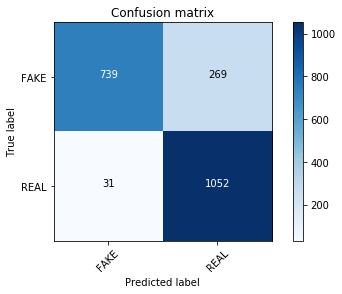

In [43]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Drawing Confusion Matrix With Bag Of Words (Count Vectorizer)


accuracy:   0.893
Confusion matrix, without normalization


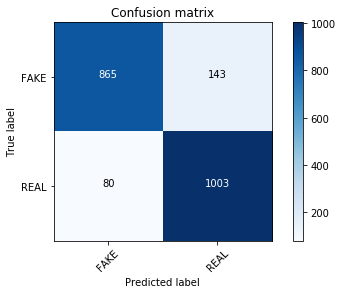

In [44]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

And indeed, with absolutely no parameter tuning, your count vectorized training set count_train is visibly outperforming your TF-IDF vectors!

### Testing Linear Models

There are a lot of great write-ups about how linear models work well with TF-IDF vectorizers (take a look at word2vec for classification, SVM reference in scikit-learn text analysis, and many more).

So you should use a SVM, right?

Well, I recently watched Victor Lavrenko's lecture on text classification and he compares Passive Aggressive classifiers to linear SVMs for text classification. We'll test this approach (which has some significant speed benefits and permanent learning disadvantages) with the fake news dataset.

### Drawing Confusion Matrix With Passive Agressive Classifier


D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.936
Confusion matrix, without normalization


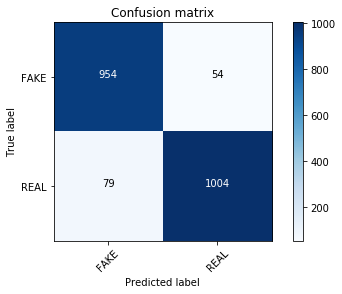

In [45]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Wow!

I'm impressed. The confusion matrix looks different and the model classifies our fake news a bit better. We can test if tuning the alpha value for a MultinomialNB creates comparable results. You can also use parameter tuning with grid search for a more exhaustive search.

In [47]:
clf = MultinomialNB(alpha=0.1)

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


Not quite... At this point, it might be interesting to perform parameter tuning across all of the classifiers, or take a look at some other scikit-learn Bayesian classifiers. You could also test with a Support Vector Machine (SVM) to see if that outperforms the Passive Aggressive classifier.

But I am a bit more curious about what the Passive Aggressive model actually has learned. So let's move onto introspection.

You can see that the linear models are outperforming the Naive Bayes classifiers, and that the accuracy scores are fairly good (even without parameter tuning).

So indeed I could replicate the results, but what did the models actually learn? What features signified real versus fake news?

### Introspecting significant features

So fake news is solved, right? We achieved 93% accuracy on my dataset so let's all close up shop and go home.

Not quite, of course. I am wary at best of these results given how much noise we saw in the features. There is a great write-up on StackOverflow with this incredibly useful function for finding vectors that most affect labels. It only works for binary classificaiton (classifiers with 2 classes), but that's good news for you, since you only have FAKE or REAL labels.

Using your best performing classifier with your TF-IDF vector dataset (tfidf_vectorizer) and Passive Aggressive classifier (linear_clf), inspect the top 30 vectors for fake and real news:

In [48]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -4.974516324801913 2016
FAKE -4.2357148600655234 october
FAKE -4.068552548689807 hillary
FAKE -3.2613936309112725 share
FAKE -2.9923723340737203 november
FAKE -2.9139405251355495 article
FAKE -2.5724711202747814 print
FAKE -2.482968892802047 email
FAKE -2.3315227633681697 source
FAKE -2.2872497143331683 advertisement
FAKE -2.196561041452055 oct
FAKE -2.0878459819756903 war
FAKE -2.0201439443835842 mosul
FAKE -1.9660786200416493 nov
FAKE -1.9519015202453096 establishment
FAKE -1.9441834450436464 election
FAKE -1.938884806463336 podesta
FAKE -1.8830031305929096 photo
FAKE -1.8538505119760396 wikileaks
FAKE -1.8209248059125436 com
FAKE -1.7378619116983265 ayotte
FAKE -1.6960048200791393 fbi
FAKE -1.681098126407165 jewish
FAKE -1.679294061819396 snip
FAKE -1.6517648751263285 pipeline
FAKE -1.6039968839759646 corporate
FAKE -1.5777148578800693 brexit
FAKE -1.556828980358826 reuters
FAKE -1.545628229339181 youtube
FAKE -1.5412182741658762 donald

REAL 4.860032862357506 said
REAL 2.66927

We can also do this in a pretty obvious way with only a few lines of Python, by zipping your coefficients to your features and taking a look at the top and bottom of your list.

In [51]:
feature_names = tfidf_vectorizer.get_feature_names()

### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701582, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741617, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [52]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

So, clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

Also, the real news data uses forms of the verb "to say" more often, likely because in newspapers and most journalistic publications sources are quoted directly ("German Chancellor Angela Merkel said...").

To extract the full list from your current classifier and take a look at each token (or easily compare tokens from classifier to classifier), you can easily export it like so.

#### Intermezzo: HashingVectorizer


Another vectorizer used sometimes for text classification is a HashingVectorizer. HashingVectorizers require less memory and are faster (because they are sparse and use hashes rather than tokens) but are more difficult to introspect. You can read a bit more about the pros and cons of using HashingVectorizer in the scikit-learn documentation if you are interested.

You can give it a try and compare its results versus the other vectorizers. It performs fairly well, with better results than the TF-IDF vectorizer using MultinomialNB (this is somewhat expected due to the same reasons CountVectorizers perform better), but not as well as the TF-IDF vectorizer with Passive Aggressive linear algorithm.

In [53]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [56]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


accuracy:   0.902
Confusion matrix, without normalization


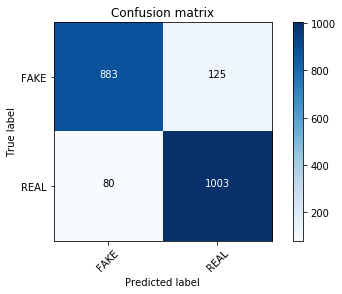

In [59]:
clf = MultinomialNB(alpha=.01)

clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.921
Confusion matrix, without normalization


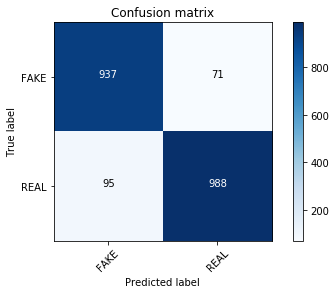

In [61]:
clf = PassiveAggressiveClassifier(n_iter=50)
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Conclusion


So was your fake news classifier experiment a success? Definitely not.

But you did get to play around with a new dataset, test out some NLP classification models and introspect how successful they were? Yes.

As expected from the outset, defining fake news with simple bag-of-words or TF-IDF vectors is an oversimplified approach. Especially with a multilingual dataset full of noisy tokens. If you hadn't taken a look at what your model had actually learned, you might have thought the model learned something meaningful. So, remember: always introspect your models (as best you can!).